<a href="https://colab.research.google.com/github/ibm513/AI_201_Assignment_2/blob/main/Gemini_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install --upgrade --quiet google-generativeai

In [2]:

from google.colab import userdata


GOOGLE_API_KEY: str = userdata.get('GOOGLE_API_KEY')


if GOOGLE_API_KEY:

  print("API key fetched successfully!")
else:

  print("API key not found. Please set the 'GEMINI_API_KEY' user data.")

API key fetched successfully!


In [3]:

import google.generativeai as genai


genai.configure(api_key=GOOGLE_API_KEY)

In [4]:

dir(genai)

['ChatSession',
 'GenerationConfig',
 'GenerativeModel',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'annotations',
 'caching',
 'configure',
 'create_tuned_model',
 'delete_file',
 'delete_tuned_model',
 'embed_content',
 'embed_content_async',
 'get_base_model',
 'get_file',
 'get_model',
 'get_operation',
 'get_tuned_model',
 'list_files',
 'list_models',
 'list_operations',
 'list_tuned_models',
 'protos',
 'responder',
 'string_utils',
 'types',
 'update_tuned_model',
 'upload_file',
 'utils']

In [5]:
for model in genai.list_models():
  print(model)

Model(name='models/chat-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 Chat (Legacy)',
      description='A legacy text-only model optimized for chat conversations',
      input_token_limit=4096,
      output_token_limit=1024,
      supported_generation_methods=['generateMessage', 'countMessageTokens'],
      temperature=0.25,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/text-bison-001',
      base_model_id='',
      version='001',
      display_name='PaLM 2 (Legacy)',
      description='A legacy model that understands text and generates text as an output',
      input_token_limit=8196,
      output_token_limit=1024,
      supported_generation_methods=['generateText', 'countTextTokens', 'createTunedTextModel'],
      temperature=0.7,
      max_temperature=None,
      top_p=0.95,
      top_k=40)
Model(name='models/embedding-gecko-001',
      base_model_id='',
      version='001',
      display_name='Embedding Gecko

In [6]:

from google.generativeai.generative_models import GenerativeModel


model: GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [7]:

dir(model)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_async_client',
 '_client',
 '_generation_config',
 '_get_tools_lib',
 '_model_name',
 '_prepare_request',
 '_safety_settings',
 '_system_instruction',
 '_tool_config',
 '_tools',
 'cached_content',
 'count_tokens',
 'count_tokens_async',
 'from_cached_content',
 'generate_content',
 'generate_content_async',
 'model_name',
 'start_chat']

## **Use images in your prompt**

Here you will download an image from a URL and pass that image in our prompt.

First, you download the image and load it with PIL:

In [8]:
!curl -o image.jpg "https://www.dualit.com/cdn/shop/articles/16308-picnic-prep.jpg?v=1685027472&width=1000"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  406k  100  406k    0     0  2411k      0 --:--:-- --:--:-- --:--:-- 2416k


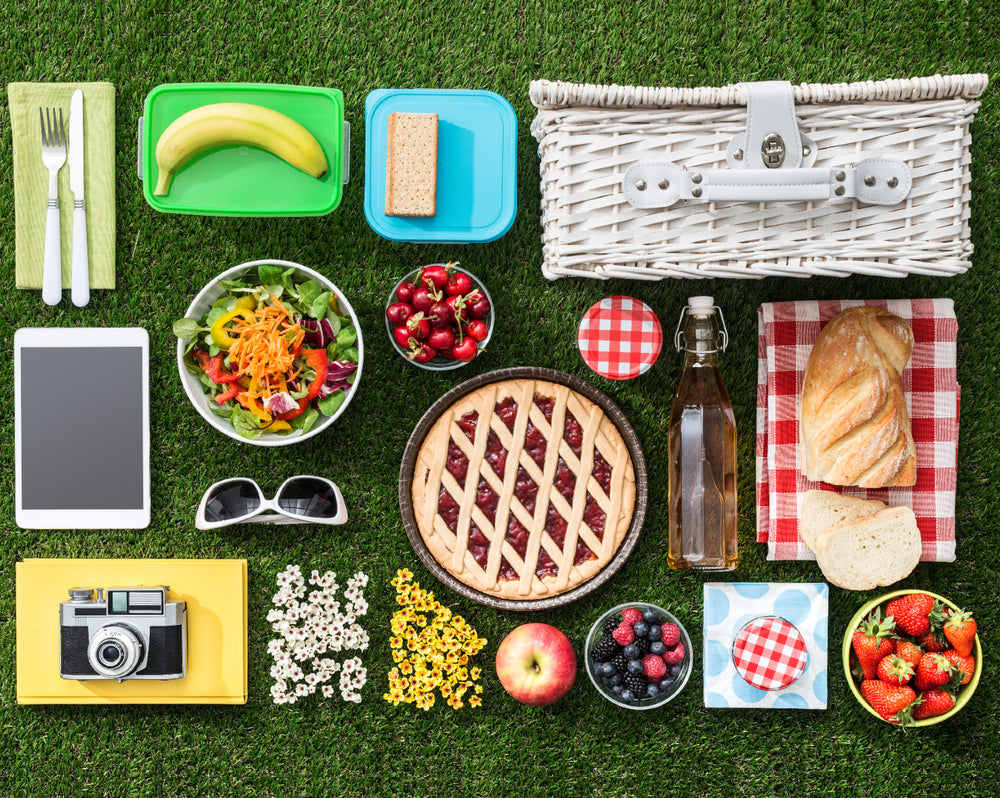

In [9]:
# Display the downloaded image
import PIL.Image
img = PIL.Image.open('image.jpg')
display(img)

In [10]:
# Write a prompt and store it in some variable
prompt = """This image contains different items that we carry on a picnic.
As mentioned in the picture, describe breifly each item as you see in the picture. Along with discription also state normal calories (if applicable) required for a normal person.
Return output in json format: {Item 1: description & calories, Item 2: description & calories} etc"""

In [11]:
from google.generativeai.types.generation_types import GenerateContentResponse
response: GenerateContentResponse = model.generate_content([prompt, img])
print(response.text)

```json
{
  "Item 1: Banana": "One ripe banana in a green plastic container.  Calories: ~105",
  "Item 2: Crackers": "A pack of crackers in a blue plastic container. Calories: varies depending on brand and size, approximately 150-200 for a typical serving.",
  "Item 3: Salad": "A bowl of fresh salad containing lettuce, carrots, and bell peppers. Calories: ~150-200 depending on the dressing and portion size.",
  "Item 4: Cherries": "A small bowl of fresh cherries. Calories: ~100 for about 1 cup ",
  "Item 5: Picnic Basket": "A white wicker picnic basket.",
  "Item 6: Bread": "A loaf of bread, sliced.  Calories: ~200-250 per slice depending on type of bread and size.",
  "Item 7: Tart": "A sweet tart with a lattice top, possibly berry filling. Calories:  ~400-500 depending on size and ingredients",
  "Item 8: Oil": "A bottle of olive oil or similar cooking oil. Calories: Varies greatly depending on amount consumed; a tablespoon has ~120 calories.",
  "Item 9: Strawberries": "A bowl of fr

---